# Notebook preparation

In the notebook, import matplotlib and use the jupyter magic command to enable direct plotting in the current Notebook.

In [10]:
import matplotlib.pyplot as pl
%matplotlib inline

One can also tweak the pandas output to enlarge the dataframes for the tabular data generated by pycoQC

In [11]:
import pandas as pd
pd.options.display.max_colwidth = 200

Default pyplot parameters can be defined at the beginning of the notebook as well (see http://matplotlib.org/users/customizing.html for more options)

In [12]:
pl.rcParams['figure.figsize'] = 20,7
pl.rcParams['font.family'] = 'sans-serif'
pl.rcParams['font.sans-serif'] = ['DejaVu Sans']

## General package information

pycoQC is a simple class that is initialized with a sequencing_summary file generated by Albacore 1.2.1 +.

The instantiated object can be subsequently called with various methods that will generates tables and plots

Each function has specific options that are comprehensively detailed in the test notebook provided with the package or in directly on Github: [Test_notebook](https://github.com/a-slide/pycoQC/blob/master/pycoQC/test_pycoQC.ipynb)

Most of the plotting functions return a matplotlib fig, ax tuple. This allows users to further customize the plotting areas thanks to the numerous set methods associated with the object (for instance Axes.set_axis_off, Axes.set_xlim, Axes.set_xscale...). 
Extensive information is available in the Matplotlib API documentation: http://matplotlib.org/api/axes_api.html.

All the plotting functions can take a [matplotlib "style"](https://matplotlib.org/users/style_sheets.html) option. To list all available styles in your environment, use:

In [13]:
print(pl.style.available)

['seaborn-talk', 'dark_background', 'seaborn-white', 'seaborn', 'seaborn-dark', 'seaborn-whitegrid', 'fivethirtyeight', 'seaborn-notebook', 'seaborn-darkgrid', 'tableau-colorblind10', 'seaborn-dark-palette', 'seaborn-bright', 'Solarize_Light2', 'seaborn-muted', 'seaborn-colorblind', 'grayscale', 'fast', 'seaborn-paper', 'seaborn-pastel', '_classic_test', 'seaborn-poster', 'seaborn-ticks', 'bmh', 'seaborn-deep', 'classic', 'ggplot']


## Import the package

In [14]:
from pycoQC.pycoQC import pycoQC

One can also import the jprint and jhelp function from pycoQC to get a improve the default print and help function in jupyter.

In [15]:
from pycoQC.pycoQC_fun import jhelp, jprint

*jhelp* Can be used to provide a full description of the pycoQC functions using the *full* option.

In [16]:
jhelp(pycoQC.reads_qual_bins, full=True)

Count the number of reads per interval of sequence quality and return a dataframe

* bins: LIST [Default [-1,0,2,4,6,8,10,12,14,16,18,20,40]]

Limits of the intervals as a list

 Or alternatively one can also use the jupyter magic "?" 

In [17]:
?pycoQC.reads_qual_bins

A sample test file previously generated by Albacore are provided with the package. They can be listed using the following function

In [19]:
df = pycoQC.example_data_files()
display(df)

,path,description
1D_DNA_1.2.1,/home/aleg/Programming/pycoQC/pycoQC/data/sequencing_summary_1D_DNA_Albacore_1.2.1.txt,Sequencing summary file generated by a 1D_DNA run basecalled by Albacore 1.2.1
1D_RNA_2.0.1,/home/aleg/Programming/pycoQC/pycoQC/data/sequencing_summary_1D_RNA_Albacore_2.0.1.txt,Sequencing summary file generated by a 1D_RNA run basecalled by Albacore 2.0.1
1D2_DNA_1.2.1,/home/aleg/Programming/pycoQC/pycoQC/data/sequencing_summary_1D2_DNA_Albacore_1.2.1.txt,Sequencing summary file generated by a 1D2_DNA run basecalled by Albacore 1.2.1
1D_DNA_1.2.3,/home/aleg/Programming/pycoQC/pycoQC/data/sequencing_summary_1D_DNA_Albacore_1.2.3.txt,Sequencing summary file generated by a 1D_DNA run basecalled by Albacore 1.2.3
1D_DNA_barcode_2.2.7,/home/aleg/Programming/pycoQC/pycoQC/data/sequencing_summary_1D_DNA_barcode_Albacore_2.2.7.txt,Sequencing summary file generated by a 1D_DNA_barcode run basecalled by Albacore 2.2.7


I recommend using of theses files to test pycoQC, but you can obviously use your own files instead

## Initialize pycoCQ

In [20]:
jhelp (pycoQC.__init__)

Parse Albacore sequencing_summary.txt file and clean-up the data

### Basic initialization

In [22]:
p = pycoQC("/home/aleg/Programming/pycoQC/pycoQC/data/sequencing_summary_1D_DNA_Albacore_1.2.1.txt", verbose=True)

### Initialization with runids reordering

If several runids are present in the file, pycoQC will order the runids bases on their order in the file, which does not always correspond to the sequencing order. Unfortunately their is no way to know the right order based on the information contained in the *sequencing_summary.txt* file alone. However if you know the order you can specify it at initialisation (or even  exclude specific runids).

In [1]:
runid_list = ["7082b6727942b3939a023beaf03ef24cec1722e5", "ad3de3b63de71c4c6d5ea4470a82782cf51210d9"]
p = pycoQC("/home/aleg/Programming/pycoQC/pycoQC/data/sequencing_summary_1D_DNA_Albacore_1.2.1.txt", runid_list=runid_list, verbose=True)

NameError: name 'pycoQC' is not defined

### Initialization with read filtering 

Some reads are not "basecallable" and consequently have a length of zero. These reads can be filtered out with the option *filter_zero_len*.

Starting from Albacore 2.0, ONT introduced additional fields in the *sequencing_summary.txt* to flag sequences that did not meet the quality requirements and sequences aligned on the internal control. These sequences can be filtered out with the options *filter_calibration* and *filter_fail*.

In [ ]:
p = pycoQC("/home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D_RNA_Albacore_2.0.1.txt", filter_calibration=True, filter_fail=True, filter_zero_len=True, verbose=True)

## Generate an overview of the data

In [ ]:
jhelp(pycoQC.overview)

In [ ]:
g = p.overview (cmap='Set3', plot_style='ggplot')

## Analyse the mean read quality distribution

pycoQC can generate a mean read quality score as a Dataframe or as a kernel density distribution plot

### reads_qual_bins

In [ ]:
jhelp(pycoQC.reads_qual_bins)

In [ ]:
## Again you don't need to initialize pycoQC every times. But if you missed it before, for this tutorial I will do it to show the output obtained with different example files
p = pycoQC("/home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D2_DNA_Albacore_1.2.1.txt", filter_zero_len=True)
p.reads_qual_bins( bins=[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 40])

### reads_qual_distribution

In [ ]:
jhelp(pycoQC.reads_qual_distribution)

In [ ]:
p = pycoQC("/home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D2_DNA_Albacore_1.2.1.txt", filter_zero_len=True)
g = p.reads_qual_distribution (figsize=[15, 4], color='dodgerblue', alpha=0.5, bandwith=0.5, sample=100000, min_qual=4, max_qual=20, plot_style='ggplot', )

## Analyse the read length distribution

Similarly pycoQC can also compute the read length distribution as a Dataframe or as a kernel density distribution plot

### reads_len_bins

In [ ]:
jhelp(pycoQC.reads_len_bins)

In [ ]:
p = pycoQC("/home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D_DNA_Albacore_1.2.1.txt", filter_zero_len=True)
p.reads_len_bins(bins=[0, 10, 25, 50, 100, 500, 1000, 5000, 10000, 100000, 10000000])

### reads_len_distribution

In [ ]:
jhelp(pycoQC.reads_len_distribution)

In [ ]:
p = pycoQC("/home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D_RNA_Albacore_2.0.1.txt", filter_zero_len=True, filter_calibration=True, filter_fail=True)
fig, ax = p.reads_len_distribution(figsize=[15,4], color='green', alpha=0.5, min_len=0, max_len=600, plot_style='ggplot')

In [ ]:
p = pycoQC("/home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D_DNA_Albacore_1.2.1.txt", filter_zero_len=True)
fig, ax = p.reads_len_distribution(figsize=[15,4], color='dodgerblue', alpha=0.5, min_len=500, xlog=True, plot_style='seaborn-white')

## Generate a 2D distribution of read length and mean quality score

In [ ]:
jhelp(pycoQC.reads_len_quality)

In [ ]:
p = pycoQC("/home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D_RNA_Albacore_2.0.1.txt", filter_calibration=True, filter_fail=True, filter_zero_len=True)
g = p.reads_len_quality (figsize=10, kde=True, scatter=True, margin_plot=True, kde_levels=15, min_len=0, max_len=600, min_qual=6.5, max_qual=11, scatter_alpha=0.1)

## Analyse the reads/bases/events output over the time of the run

In [ ]:
jhelp(pycoQC.output_over_time)

In [ ]:
p = pycoQC("/home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D_DNA_Albacore_1.2.1.txt", filter_zero_len=True)
g = p.output_over_time(level='bases', figsize=[15, 4], bin_size=240, bin_smothing=5)

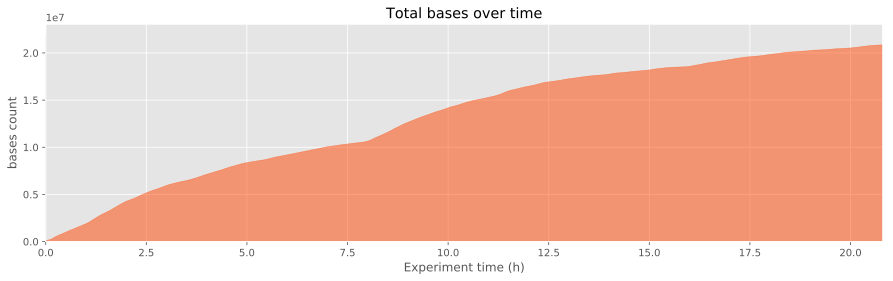

In [68]:
p = pycoQC("/home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D2_DNA_Albacore_1.2.1.txt", filter_zero_len=True)
g = p.output_over_time(level='bases', figsize=[15, 4], color='orangered', cumulative=True)

## Analyse the evolution of the mean read quality over the time of the run

In [ ]:
jhelp(pycoQC.quality_over_time)

In [2]:
p = pycoQC("/home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D_DNA_Albacore_1.2.1.txt", filter_zero_len=True)
g = p.quality_over_time(figsize=[15, 4], win_size=0.5)

NameError: name 'pycoQC' is not defined

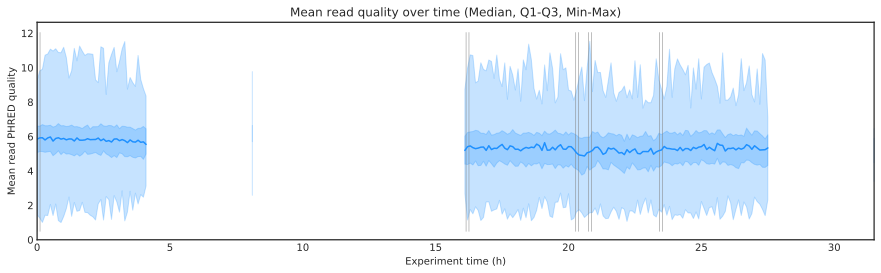

In [77]:
p = pycoQC("/home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D_RNA_Albacore_2.0.1.txt", filter_zero_len=True)
g = p.quality_over_time(runid_lines=True, figsize=[15, 4], color='dodgerblue', win_size=0.1, plot_style='seaborn-white')

## Overview of the activity of flowcell channels

In [ ]:
jhelp(pycoQC.channels_activity)

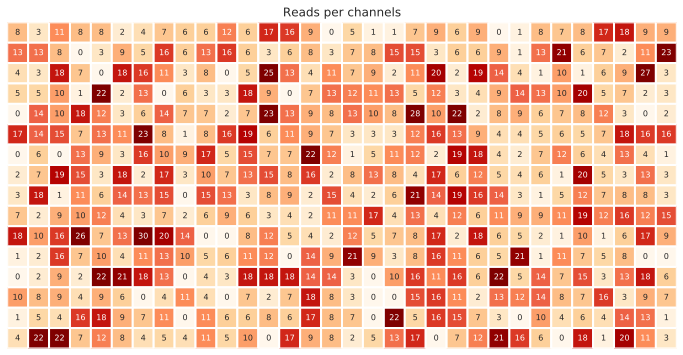

In [81]:
p = pycoQC("/home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D_RNA_Albacore_2.0.1.txt", filter_zero_len=True, filter_fail=True)
g = p.channels_activity(level='reads', figsize=[12,6])

In [ ]:
p = pycoQC("/home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D_RNA_Albacore_2.0.1.txt", filter_zero_len=True, filter_fail=True)
g = p.channels_activity(level='events', cmap="viridis_r", cbar=True, annot=False, figsize=[15,6])

# Note to power-users and developers

Please be aware that pycoQC is an experimental package that is still under development. It was tested under Linux Ubuntu 16.04 and in an HPC environment running under Red Hat Enterprise 7.1.

You are welcome to contribute by requesting additional functionalities, reporting bugs or by forking and submitting patches or updates pull requests

Thank you

### Contributors

Jon Sanders [Github](https://github.com/tanaes)

### Acknowledgments

Thanks to [Kim Judge](https://twitter.com/kim_judge_) for providing a few example sequencing summary files.